In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.append("/home/ubuntu/fastai/old")

In [3]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [4]:
!pwd

/home/ubuntu/elo


In [5]:
PATH = "data/"

In [6]:
!ls {PATH}

Data_Dictionary.xlsx		    new_merchant_transactions.csv
historical_transactions.csv	    new_merchant_transactions.csv.zip
historical_transactions.csv.zip     sample_submission.csv.zip
historical_transactions_100000.csv  test.csv
historical_transactions_20000.csv   test.csv.zip
merchants.csv			    train.csv
merchants.csv.zip		    train.csv.zip


From checking the column descriptions in Kaggles data tab we can check for dates to parse

In [7]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False, 
                     parse_dates=["first_active_month"])

In [8]:
df_raw.tail().T

,201912,201913,201914,201915,201916
first_active_month,2017-09-01 00:00:00,2015-10-01 00:00:00,2017-08-01 00:00:00,2016-07-01 00:00:00,2017-07-01 00:00:00
card_id,C_ID_963962de2c,C_ID_1314773c0b,C_ID_7666735b3d,C_ID_73f5a0efd0,C_ID_92c9984c58
feature_1,3,3,4,3,3
feature_2,2,1,3,2,1
feature_3,1,1,0,1,1
target,-2.74082,0.312917,0.0934941,-4.67659,-1.85941


In [9]:
df_raw.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
first_active_month,201917,75,2017-09-01 00:00:00,13878,2011-11-01 00:00:00,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_id,201917,201917,C_ID_2170ea92eb,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_1,201917,NaN,NaN,NaN,NaN,NaN,3.10531,1.18616,1,2,3,4,5
feature_2,201917,NaN,NaN,NaN,NaN,NaN,1.74541,0.751362,1,1,2,2,3
feature_3,201917,NaN,NaN,NaN,NaN,NaN,0.565569,0.495683,0,0,1,1,1
target,201917,NaN,NaN,NaN,NaN,NaN,-0.393636,3.8505,-33.2193,-0.88311,-0.0234369,0.765453,17.9651


In [10]:
!ls {PATH}

Data_Dictionary.xlsx		    new_merchant_transactions.csv
historical_transactions.csv	    new_merchant_transactions.csv.zip
historical_transactions.csv.zip     sample_submission.csv.zip
historical_transactions_100000.csv  test.csv
historical_transactions_20000.csv   test.csv.zip
merchants.csv			    train.csv
merchants.csv.zip		    train.csv.zip


In [11]:
# num_lines = 29112362

In [12]:
df_hist = pd.read_csv(f'{PATH}historical_transactions_20000.csv',
                     parse_dates=['purchase_date'])

In [13]:
df_hist.tail().T

,19995,19996,19997,19998,19999
authorized_flag,Y,Y,Y,Y,N
card_id,C_ID_3b46230c96,C_ID_deadbd02f1,C_ID_1ad229068b,C_ID_795daadee6,C_ID_0040a0ec1f
city_id,137,119,212,331,88
category_1,N,N,N,N,N
installments,0,0,0,0,0
category_3,A,A,A,A,A
merchant_category_id,2,842,419,14,705
merchant_id,M_ID_a0087a55ef,M_ID_fc62f7fbdf,M_ID_f2a7d3772b,M_ID_10ee5d285a,M_ID_f1480cd2d8
month_lag,-8,-6,-2,0,-1
purchase_amount,-0.518505,-0.73128,-0.729026,-0.696404,-0.674781


In [14]:
df_hist.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
authorized_flag,20000,2,Y,18263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_id,20000,18610,C_ID_3d3dfdc692,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_id,20000,NaN,NaN,NaN,NaN,NaN,129.685,103.902,-1,57,91,212,347
category_1,20000,2,N,18588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installments,20000,NaN,NaN,NaN,NaN,NaN,0.63595,1.17217,-1,0,0,1,12
category_3,19884,3,A,10690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_category_id,20000,NaN,NaN,NaN,NaN,NaN,479.787,250.654,-1,307,454,705,891
merchant_id,19894,12111,M_ID_00a6ca8a8a,819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month_lag,20000,NaN,NaN,NaN,NaN,NaN,-4.50105,3.60224,-13,-7,-4,-2,0
purchase_amount,20000,NaN,NaN,NaN,NaN,NaN,-0.57779,0.543432,-0.746878,-0.719984,-0.688079,-0.601988,24.6178


#### Pre-processing

In [15]:
df_raw = df_raw.set_index('card_id')
df_hist = df_hist.set_index('card_id')

In [16]:
add_datepart(df_raw, 'first_active_month')
add_datepart(df_hist, 'purchase_date')

In [17]:
df_raw.columns

Index(['feature_1', 'feature_2', 'feature_3', 'target',
       'first_active_monthYear', 'first_active_monthMonth',
       'first_active_monthWeek', 'first_active_monthDay',
       'first_active_monthDayofweek', 'first_active_monthDayofyear',
       'first_active_monthIs_month_end', 'first_active_monthIs_month_start',
       'first_active_monthIs_quarter_end',
       'first_active_monthIs_quarter_start', 'first_active_monthIs_year_end',
       'first_active_monthIs_year_start', 'first_active_monthElapsed'],
      dtype='object')

In [18]:
df_hist.columns

Index(['authorized_flag', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'category_2', 'state_id', 'subsector_id',
       'purchase_Year', 'purchase_Month', 'purchase_Week', 'purchase_Day',
       'purchase_Dayofweek', 'purchase_Dayofyear', 'purchase_Is_month_end',
       'purchase_Is_month_start', 'purchase_Is_quarter_end',
       'purchase_Is_quarter_start', 'purchase_Is_year_end',
       'purchase_Is_year_start', 'purchase_Elapsed'],
      dtype='object')

#### Train using only simple train csv

In [19]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw.drop('target', axis=1), df_raw.target)

/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
m.score(df_raw.drop('target', axis=1), df_raw.target)

0.007915166709855814

Submissions are scored on the root mean squared error. RMSE is defined as:

$$RMSE= \sqrt{\frac{1}{n} \sum_{i=1}^n{(y_i - \hat{y}_i)}^2}$$

where $\hat{y}$ is the predicted loyalty score for each `card_id`, and $y$ is the actual loyalty score assigned to a `card_id`.

In [21]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

In [22]:
def print_score(m):
    cols = ['RMSE train', 'RMSE valid', 'Score train', 'Score valid']
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): 
        res.append(m.oob_score_)
        cols.append('OOB score')
    print(list(zip(cols,res)))

In [23]:
df, y, nas = proc_df(df_raw, 'target')

In [24]:
# ??proc_df

In [25]:
def get_column_dtypes(df):
    columns_by_dtype = df.columns.groupby(df.dtypes)
    return {k.name: v for k, v in columns_by_dtype.items()}

In [26]:
get_column_dtypes(df)

{'bool': Index(['first_active_monthIs_month_end', 'first_active_monthIs_month_start',
        'first_active_monthIs_quarter_end',
        'first_active_monthIs_quarter_start', 'first_active_monthIs_year_end',
        'first_active_monthIs_year_start'],
       dtype='object'),
 'int64': Index(['feature_1', 'feature_2', 'feature_3', 'first_active_monthYear',
        'first_active_monthMonth', 'first_active_monthWeek',
        'first_active_monthDay', 'first_active_monthDayofweek',
        'first_active_monthDayofyear', 'first_active_monthElapsed'],
       dtype='object')}

In [27]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 10000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((191917, 16), (191917,), (10000, 16))

In [28]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1.85 s, sys: 24.2 ms, total: 1.87 s
Wall time: 1.88 s
[('RMSE train', 3.825733115733398), ('RMSE valid', 4.020333420226288), ('Score train', 0.008164980694534973), ('Score valid', -0.0001494429279831344)]


This currently puts us at roughly 989/1003 in the leaderboard :/ (top score is 3.681)

#### Train a subset and have a look at a shallow tree to see some of the important features in this dataset

In [29]:
df_trn, y_trn, nas = proc_df(df_raw, 'target', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [30]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[('RMSE train', 3.762938183981523), ('RMSE valid', 4.014939075066462), ('Score train', 0.007165945034619425), ('Score valid', 0.0025326887405849874)]


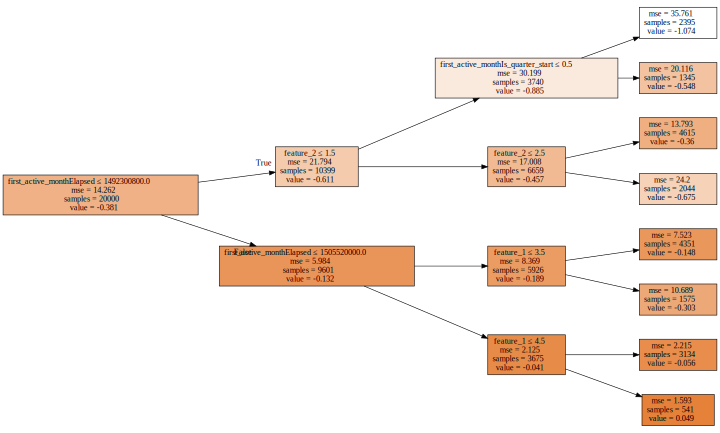

In [31]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [32]:
# ??draw_tree

## Join central data to historical data

In [33]:
df_join = df_raw.join(df_hist, how='inner')
df_join.head(10)

,feature_1,feature_2,feature_3,target,first_active_monthYear,first_active_monthMonth,first_active_monthWeek,first_active_monthDay,first_active_monthDayofweek,first_active_monthDayofyear,...,purchase_Day,purchase_Dayofweek,purchase_Dayofyear,purchase_Is_month_end,purchase_Is_month_start,purchase_Is_quarter_end,purchase_Is_quarter_start,purchase_Is_year_end,purchase_Is_year_start,purchase_Elapsed
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_0001506ef0,2,2,0,0.884295,2016,7,26,1,4,183,...,16,5,259,False,False,False,False,False,False,1505573697
C_ID_0009ae74c1,3,1,1,3.141863,2016,10,39,1,5,275,...,24,4,83,False,False,False,False,False,False,1490372897
C_ID_000b503737,1,3,0,-0.612948,2017,1,52,1,6,1,...,13,0,44,False,False,False,False,False,False,1486976681
C_ID_000f6fea6a,2,3,0,0.165182,2017,2,5,1,2,32,...,17,0,107,False,False,False,False,False,False,1492426251
C_ID_0024aaee36,3,2,1,-2.237071,2017,1,52,1,6,1,...,13,2,347,False,False,False,False,False,False,1513188655
C_ID_0028e15a78,2,1,0,-0.040760,2017,10,39,1,6,274,...,25,2,298,False,False,False,False,False,False,1508945629
C_ID_002936ada6,3,2,1,-0.024135,2016,4,13,1,4,92,...,4,6,155,False,False,False,False,False,False,1496588599
C_ID_002936ada6,3,2,1,-0.024135,2016,4,13,1,4,92,...,1,2,60,False,True,False,False,False,False,1488401316
C_ID_0032aebb26,3,2,1,-0.151734,2017,7,26,1,5,182,...,12,5,224,False,False,False,False,False,False,1502575435


In [34]:
df_join.columns

Index(['feature_1', 'feature_2', 'feature_3', 'target',
       'first_active_monthYear', 'first_active_monthMonth',
       'first_active_monthWeek', 'first_active_monthDay',
       'first_active_monthDayofweek', 'first_active_monthDayofyear',
       'first_active_monthIs_month_end', 'first_active_monthIs_month_start',
       'first_active_monthIs_quarter_end',
       'first_active_monthIs_quarter_start', 'first_active_monthIs_year_end',
       'first_active_monthIs_year_start', 'first_active_monthElapsed',
       'authorized_flag', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'category_2', 'state_id', 'subsector_id',
       'purchase_Year', 'purchase_Month', 'purchase_Week', 'purchase_Day',
       'purchase_Dayofweek', 'purchase_Dayofyear', 'purchase_Is_month_end',
       'purchase_Is_month_start', 'purchase_Is_quarter_end',
       'purchase_Is_quarter_start', 'purchase_Is_year_end',
       '

In [35]:
df_join.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
feature_1,12278,NaN,NaN,NaN,3.12746,1.26685,1,2,3,4,5
feature_2,12278,NaN,NaN,NaN,1.74263,0.701452,1,1,2,2,3
feature_3,12278,NaN,NaN,NaN,0.544144,0.498068,0,0,1,1,1
target,12278,NaN,NaN,NaN,-0.501843,3.85346,-33.2193,-0.7859,-0.0692802,0.571359,13.3106
first_active_monthYear,12278,NaN,NaN,NaN,2016.44,0.760275,2012,2016,2017,2017,2017
first_active_monthMonth,12278,NaN,NaN,NaN,6.9732,3.44961,1,4,7,10,12
first_active_monthWeek,12278,NaN,NaN,NaN,30.1929,14.4525,1,18,31,44,53
first_active_monthDay,12278,NaN,NaN,NaN,1,0,1,1,1,1,1
first_active_monthDayofweek,12278,NaN,NaN,NaN,3.13455,1.90859,0,2,3,5,6
first_active_monthDayofyear,12278,NaN,NaN,NaN,182.231,105.133,1,91,183,274,336


In [36]:
train_cats(df_join)

In [37]:
get_column_dtypes(df_join)

{'int64': Index(['feature_1', 'feature_2', 'feature_3', 'first_active_monthYear',
        'first_active_monthMonth', 'first_active_monthWeek',
        'first_active_monthDay', 'first_active_monthDayofweek',
        'first_active_monthDayofyear', 'first_active_monthElapsed', 'city_id',
        'installments', 'merchant_category_id', 'month_lag', 'state_id',
        'subsector_id', 'purchase_Year', 'purchase_Month', 'purchase_Week',
        'purchase_Day', 'purchase_Dayofweek', 'purchase_Dayofyear',
        'purchase_Elapsed'],
       dtype='object'),
 'float64': Index(['target', 'purchase_amount', 'category_2'], dtype='object'),
 'bool': Index(['first_active_monthIs_month_end', 'first_active_monthIs_month_start',
        'first_active_monthIs_quarter_end',
        'first_active_monthIs_quarter_start', 'first_active_monthIs_year_end',
        'first_active_monthIs_year_start', 'purchase_Is_month_end',
        'purchase_Is_month_start', 'purchase_Is_quarter_end',
        'purchase_Is_quar

In [38]:
df_join.merchant_id.cat.categories

Index(['M_ID_000ab1982d', 'M_ID_0016a78910', 'M_ID_001d92b649',
       'M_ID_003744d4bd', 'M_ID_003b770759', 'M_ID_003b8dff7c',
       'M_ID_0043132ca5', 'M_ID_004995eae1', 'M_ID_005cd67d2d',
       'M_ID_0067af64fc',
       ...
       'M_ID_ffdded9527', 'M_ID_ffe808715c', 'M_ID_ffe938d241',
       'M_ID_ffe9d45276', 'M_ID_ffeb1929c8', 'M_ID_ffee08e75b',
       'M_ID_fff0c467ae', 'M_ID_fff6541e56', 'M_ID_fffcd0e14d',
       'M_ID_fffd4df9cd'],
      dtype='object', length=8046)

In [39]:
df, y, nas = proc_df(df_join, 'target')

In [40]:
n_valid = 1000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((11278, 42), (11278,), (1000, 42))

In [41]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/ubuntu/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1.61 s, sys: 7.98 ms, total: 1.62 s
Wall time: 1.62 s
[('RMSE train', 1.7232722222413728), ('RMSE valid', 4.358248642794486), ('Score train', 0.7951798944604961), ('Score valid', -0.012109298847001737)]


This is worse than before :( but it looks like the model is overfitting

Can't draw this, probably due to too many features?

## Use subset of `new_marchant_transactions`

Generate sample

In [48]:
!ls {PATH}

Data_Dictionary.xlsx		    new_merchant_transactions.csv.zip
historical_transactions.csv	    new_merchant_transactions_20000.csv
historical_transactions.csv.zip     sample_submission.csv.zip
historical_transactions_100000.csv  test.csv
historical_transactions_20000.csv   test.csv.zip
merchants.csv			    train.csv
merchants.csv.zip		    train.csv.zip
new_merchant_transactions.csv


In [44]:
SAMPLE_SIZE=20000

In [47]:
!head -n 1 {PATH}new_merchant_transactions.csv > {PATH}new_merchant_transactions_{SAMPLE_SIZE}.csv

In [50]:
!command | tail -n +2 | shuf -n {SAMPLE_SIZE} {PATH}new_merchant_transactions.csv >> {PATH}new_merchant_transactions_{SAMPLE_SIZE}.csv

In [51]:
!head {PATH}new_merchant_transactions_{SAMPLE_SIZE}.csv

authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
Y,C_ID_5ea3f4c672,137,N,0,A,307,M_ID_b36f919325,2,-0.70182826,2018-04-10 18:14:13,3.00000000,19,19
Y,C_ID_0a20850fa7,322,N,1,B,705,M_ID_e522b62520,1,-0.68956663,2018-03-11 13:26:12,3.00000000,11,33
Y,C_ID_92029282f1,169,N,1,B,307,M_ID_3bb794f34e,2,-0.56087958,2018-04-07 13:09:55,5.00000000,20,19
Y,C_ID_2bdeac923c,90,N,2,C,506,M_ID_723bdb64eb,1,-0.64002422,2018-03-21 16:53:36,1.00000000,15,30
Y,C_ID_e190f33891,143,N,1,B,683,M_ID_33fc872593,2,-0.64086570,2018-04-09 11:26:23,5.00000000,5,34
Y,C_ID_89f67ec649,69,N,0,A,879,M_ID_00a6ca8a8a,2,-0.70182826,2018-04-02 17:21:59,1.00000000,9,29
Y,C_ID_6c2a4d7299,57,N,1,B,705,M_ID_be36b04153,1,-0.32185286,2018-03-04 18:45:58,5.00000000,5,33
Y,C_ID_f9b7e81d16,69,N,1,B,840,M_ID_bdaeee4a0e,2,-0.52151012,2018-04-14 12:52:26,1.00000000,9,20
Y,C_ID_3fe68fff99,19,N,0,A,560,M_ID_d8e0d42

In [52]:
df_new = pd.read_csv(f'{PATH}new_merchant_transactions_{SAMPLE_SIZE}.csv')

In [53]:
df_new.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
authorized_flag,20000,1,Y,20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card_id,20000,18807,C_ID_f6029e111c,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_id,20000,NaN,NaN,NaN,135.116,101.736,-1,69,110,213,347
category_1,20000,2,N,19370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installments,20000,NaN,NaN,NaN,0.68455,1.19328,-1,0,1,1,12
category_3,19479,3,A,9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_category_id,20000,NaN,NaN,NaN,434.281,245.318,2,278,369,683,891
merchant_id,19707,14174,M_ID_00a6ca8a8a,223,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month_lag,20000,NaN,NaN,NaN,1.48195,0.499687,1,1,1,2,2
purchase_amount,20000,NaN,NaN,NaN,-0.549247,0.629205,-0.746893,-0.716558,-0.676028,-0.581616,29.3061


In [54]:
df_new = df_new.set_index('card_id')

In [55]:
add_datepart(df_new, 'purchase_date')

In [56]:
df_join = df_join.join(df_new, how='inner')
df_join.head(10)

ValueError: columns overlap but no suffix specified: Index(['authorized_flag', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'category_2', 'state_id', 'subsector_id',
       'purchase_Year', 'purchase_Month', 'purchase_Week', 'purchase_Day',
       'purchase_Dayofweek', 'purchase_Dayofyear', 'purchase_Is_month_end',
       'purchase_Is_month_start', 'purchase_Is_quarter_end',
       'purchase_Is_quarter_start', 'purchase_Is_year_end',
       'purchase_Is_year_start', 'purchase_Elapsed'],
      dtype='object')